# HSE 2021: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1 points)
* [Task 2](#task2) (1 points)
* [Task 3](#task3) (1 points)
* [Task 4](#task4) (1 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Download the file `data_Mar_64.txt`.

In [1]:
!wget https://raw.githubusercontent.com/AKuzina/ml_se/main/hw/hw_5/data_Mar_64.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/ml/datasets/One-hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK. 

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [3]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [4]:
import numpy as np
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics (e.g. Logistic regression).
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [5]:
# Ozmaden Deniz BSE-196

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [6]:
# directly following LabelEncoder documentation
le = preprocessing.LabelEncoder()
y = le.fit_transform(y_name)

Split your data into **train** and **test**.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 0)

Train a simple classifier on your data to predict target. Calculate accuracy, F-score.

In [8]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC

In [9]:
clf = SVC(kernel = "linear") # make simple SVM = linear SVM
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [10]:
print(y_pred)

[37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 21 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 16 37 37 37 37 37 37 37 37 37
 37 37 37 37 21 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 21 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 21 37 37 37 37 37 37 37 37 37 37 21 37 37 37 37 37 37 37
 37 37 37 37 37 37 37 37 16 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37

In [11]:
accu = accuracy_score(y_test, y_pred)
print("Classifier Accuracy: {}".format(accu))

Classifier Accuracy: 0.00625


In [12]:
fscore = f1_score(y_test, y_pred, average = "micro") # use micro to count totals
print("Classifier F1 score: {}".format(fscore))

Classifier F1 score: 0.006250000000000001


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=0`

In [13]:
from sklearn.decomposition import PCA

In [14]:
pc_analysis = PCA(random_state = 0, n_components = 2, svd_solver = 'auto') # reduce dimension space to 2
pca_points = pc_analysis.fit_transform(X)

Select objects that match values from 0 to 14 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<15]` to the `scatter` method.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
pca_plot = np.transpose(pca_points[y <= 14])
x_plot = pca_plot[0]
y_plot = pca_plot[1]

In [17]:
def plot_points(x_plot, y_plot, colors, title):
    plt.title(title)
    plt.scatter(x_plot, y_plot, c = colors)
    plt.show()

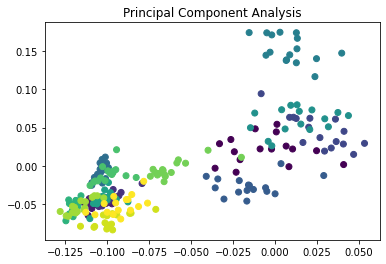

In [18]:
plot_points(x_plot, y_plot, y[y <= 14], title = "Principal Component Analysis")

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

In [19]:
from sklearn.manifold import TSNE

In [20]:
tnse = TSNE(random_state = 0)
tnse_points = tnse.fit_transform(X)

In [21]:
tnse_plot = np.transpose(tnse_points[y <= 14])
x_plot = tnse_plot[0]
y_plot = tnse_plot[1]

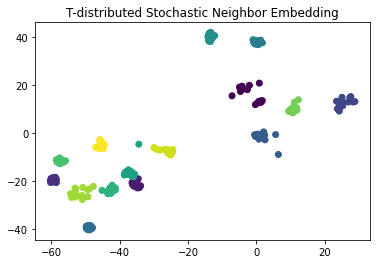

In [22]:
plot_points(x_plot, y_plot, y[y <= 14], title = "T-distributed Stochastic Neighbor Embedding")

**Task 2. <a id="task2"></a> (1 points)** Specify the coordinates of the object with index 0 (`X[0]`) after applying the TSNE method. Round the numbers to hundredths.

In [23]:
cords_1_tsne = tnse_points[0]

print("X[0] coordinates after TSNE: ({:.2f}, {:.2f})".format(cords_1_tsne[0], cords_1_tsne[1]))

X[0] coordinates after TSNE: (-7.12, 15.60)


**Task 3. <a id="task3"></a> (1 points)** Specify the coordinates of the object with index 0 (`X[0]`) after applying the PCA method. Round the numbers to hundredths.

In [24]:
cords_1_pca = pca_points[0]

print("X[0] coordinates after PCA: ({:.2f}, {:.2f})".format(cords_1_pca[0], cords_1_pca[1]))

X[0] coordinates after PCA: (-0.03, 0.03)


**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

### Answer: 2 ###


## K_means

**Task 5. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [25]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax): 
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')

class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)
        self.centers_length = None

    def update_centers(self, X):

        # centers = np.empty(self.centers_length)
        # At first I tried creating an empty array and then insert 
        # the coords into an element, but it didn't work

        centers = []
        # So I decided to do it the old way
        # I will be using a regular list since numpy.append is considered bad practice
        # https://stackoverflow.com/questions/31250129/python-numpy-array-of-numpy-arrays
        # https://towardsdatascience.com/python-lists-are-sometimes-much-faster-than-numpy-heres-a-proof-4b3dad4653ad
        
        for i in range(self.centers_length):
            class_objects = X[i == self.labels]
            class_objects = np.array(class_objects)
            center_coords = np.mean(class_objects, axis = 0)
            
            centers.append(center_coords)
            # if I used NumPy array this would have been np.append(centers, center_coords)

            # centers[i] = np.array(mean)
            # ValueError: setting an array element with a sequence.

        # turn the coords into np.array
        centers = np.asarray(centers)
        return centers 
    
    def update_lables(self, X):
        # We need to calculate the distance between each point and the centers
        # Euclidian distance, to be precise (as mentioned in the seminar)
        return pairwise_distances_argmin(X, self.centers)
    
    def fit(self, X):
        sample = np.arange(len(X))
        # Took this code from previous homework
        rnd_gen = np.random.default_rng(seed = self.seed)
        center_coords = rnd_gen.choice(sample, size = self.n_clusters, replace = False)

        # choose random cluster centers for now
        self.centers = X[center_coords]
        self.centers_length = len(self.centers)
        
        self.labels = self.update_lables(X)

        for it in range(self.n_iters):
            new_labels = self.update_lables(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0
      
            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3)
            clear_output(wait=True)
            
        return 1
    
    def predict(self, X):
        labels = self.update_lables(X)
        return labels

Generating data for clustering

In [26]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [27]:
X, y = noisy_blobs

**Task 6. <a id="task6"></a> (1.5 points)** 

6.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=100`. Specify the response for the object with index 1.

In [28]:
def get_kmeans(X, n_clusters, n_iter):
    kmeans = MyKMeans(n_clusters, n_iter)
    kmeans.fit(X)
    pred = kmeans.predict(X)
    return pred

Converge by tolerance centers
Predicted cluster: 0


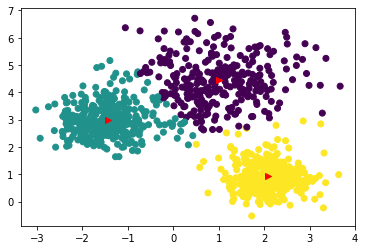

In [29]:
first_pred = get_kmeans(X, 3, 100)
print("Predicted cluster: {}".format(first_pred[1]))

6.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 5`. Specify the response for the object with index 1.

In [30]:
second_pred = get_kmeans(X, 3, 5)
print("Predicted cluster: {}".format(second_pred[1]))

# I don't really know why the graph doesn't show up at 5 iterations.
# I think the code just executes really fast and jupyter kinda lags.
# Interestingly the graph actually shows up at n_iteration = 6.

Predicted cluster: 0


6.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 5 to 100

In [31]:
num_of_changed = np.sum(first_pred != second_pred)
print("Number of changed predictions: {}".format(num_of_changed))

Number of changed predictions: 2


**Task 7. <a id="task6"></a> (1.5 points)** 

Using the elbow method, select the optimal number of clusters. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them. To do this, iterate the parameter k from 2 to 50 in steps of 2. 

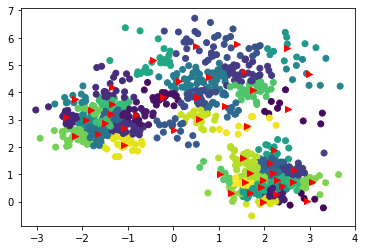

In [32]:
clusters = np.arange(2, 50, 2)

# I'm not sure about the metrics since it's really unclear in the description
# In the seminar we had a part about within cluster variance, which is the sum of squares of distances divided by total amount of observations in the cluster
# But here it's just "sum of the squares of the distances", without the divison part?
# I understand "sum of the squares of the distances" this way:
# euclidian distance defined as sqrt( (x1 - x2)**2 + (y1 - y2)**2 )
# therefore square of the distance is the above formula without the sqrt
# and for each k cluster we need to sum all such distances of points

distances_sum = []

within_cluster_variance = []
# I also did the within-cluster variance thing from the seminar 10 in case I was mistaken about the metric
# WCV is basically sum of distances (or inertia as implemented in sklearn KMeans) divided by number of samples

for k in clusters:
    clusterer = MyKMeans(n_clusters = k, n_iters = 5, seed = 0) 
    clusterer.fit(X)

    # now as far as I understand for each point we need to find a cluster assigned to them
    # I interpret that as a cluster assigned by the prediction?
    # but it could also just be clusterer.labels
    pred = clusterer.predict(X)

    # made this for convenience
    centroids = clusterer.centers

    sum = 0
    for i in range(len(X)):
        dist = X[i] - centroids[pred[i]] # distance between two points 
        squared_dist = np.square(dist) # (x1 - x2)**2, (y1 - y2)**2
        euclidian_dist = np.sum(squared_dist) # (x1 - x2)**2 + (y1 - y2)**2
        sum += euclidian_dist

    distances_sum.append(sum)
    within_cluster_variance.append(sum / len(X)) # sum / len(X)

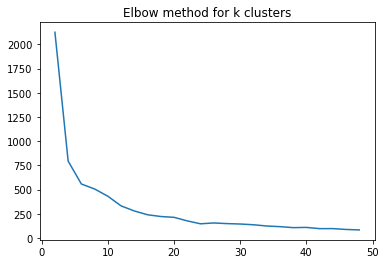

In [33]:
plt.title("Elbow method for k clusters")
plt.plot(np.arange(2, 50, 2), distances_sum)
plt.show()

# we can see from infection point of the graph that the optimal number of clusters is probably around 10

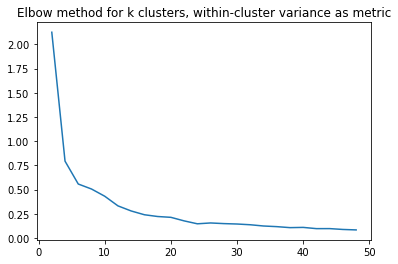

In [34]:
plt.title("Elbow method for k clusters, within-cluster variance as metric")
plt.plot(np.arange(2, 50, 2), within_cluster_variance)
plt.show()

# within-cluster variance = sum of distances / number of observations

## DBSCAN

**Task 8. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.5` hyperparameter. Specify the response for the object with index 1.

In [35]:
from sklearn.cluster import DBSCAN

clusterer = DBSCAN(eps = 0.5) # as in the description of the task
clusters = clusterer.fit(X)
point = clusterer.labels_[1]
print("Label for object with index 1: {}".format(point))

Label for object with index 1: 0


**Task 9. <a id="task8"></a> (1 point)** 9.1 Specify the resulting number of clusters

In [36]:
clusters = np.unique(clusterer.labels_)
# -1 not a cluster, but an outlier
num_of_clusters = np.sum(clusters != -1)
print("Number of clusters: {}".format(num_of_clusters))

Number of clusters: 1


9.2 How many objects were counted as outliers (marked -1)?

In [37]:
num_of_outliers = np.sum(clusterer.labels_ == -1)
print("Amount of outliers: {}".format(num_of_outliers))

Amount of outliers: 11
